In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,

)
# Load dataset
df = pd.read_csv("structured_parking_data_2024.csv")


In [2]:
#check for missing values
df.isnull().sum() * 100 / df.shape[0]



Timestamp                      0.0
Parking_Lot_ID                 0.0
Total_Parking_Slots            0.0
Hour                           0.0
Weather                        0.0
Event                          0.0
Holiday                        0.0
Available_Car_Spots            0.0
Available_Van_Spots            0.0
Available_Truck_Spots          0.0
Available_Motorcycle_Spots     0.0
Avg_Entry_15Min                0.0
Avg_Exit_15Min                 0.0
Avg_Waiting_Time               0.0
Rush_Time                      0.0
Car_Booking_Count              0.0
Van_Booking_Count              0.0
Truck_Booking_Count            0.0
Motorcycle_Booking_Count       0.0
Total_Booking_Count            0.0
Total_Available_Slots          0.0
Total_Used_Slots               0.0
Regular_Customer_Count         0.0
VIP_Customer_Count             0.0
Subscription_Customer_Count    0.0
OneTime_Customer_Count         0.0
Total_Customer_Type            0.0
dtype: float64

In [3]:
df.describe()

,Parking_Lot_ID,Total_Parking_Slots,Hour,Event,Holiday,Available_Car_Spots,Available_Van_Spots,Available_Truck_Spots,Available_Motorcycle_Spots,Avg_Entry_15Min,...,Truck_Booking_Count,Motorcycle_Booking_Count,Total_Booking_Count,Total_Available_Slots,Total_Used_Slots,Regular_Customer_Count,VIP_Customer_Count,Subscription_Customer_Count,OneTime_Customer_Count,Total_Customer_Type
count,351360.000000,351360.000000,351360.000000,351360.000000,351360.000000,351360.000000,351360.000000,351360.000000,351360.000000,351360.000000,...,351360.000000,351360.000000,351360.000000,351360.000000,351360.000000,351360.000000,351360.000000,351360.000000,351360.000000,351360.000000
mean,5.500000,2630.800000,11.500000,0.298810,0.149476,449.159651,149.386145,74.443246,74.443246,16.997399,...,5.500652,9.499106,56.516766,747.432289,56.516766,16.992256,5.495503,9.499180,5.500467,162.559933
std,2.872285,1318.642904,6.922196,0.457737,0.356558,468.892179,156.297502,78.149278,78.149278,7.203238,...,2.290649,2.869475,12.850679,781.487311,12.850679,7.212941,2.290457,2.870338,2.291706,38.666524
min,1.000000,730.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,...,2.000000,5.000000,22.000000,1.000000,22.000000,5.000000,2.000000,5.000000,2.000000,44.000000
25%,3.000000,1369.000000,5.750000,0.000000,0.000000,109.000000,36.000000,18.000000,18.000000,11.000000,...,4.000000,7.000000,46.000000,181.000000,46.000000,11.000000,4.000000,7.000000,3.000000,135.000000
50%,5.500000,2902.000000,11.500000,0.000000,0.000000,272.000000,90.000000,45.000000,45.000000,17.000000,...,5.000000,9.000000,57.000000,452.000000,57.000000,17.000000,5.000000,9.000000,5.000000,163.000000
75%,8.000000,3771.000000,17.250000,1.000000,0.000000,623.000000,207.000000,103.000000,103.000000,23.000000,...,8.000000,12.000000,67.000000,1036.000000,67.000000,23.000000,7.000000,12.000000,7.000000,190.000000
max,10.000000,4372.000000,23.000000,1.000000,1.000000,2360.000000,786.000000,393.000000,393.000000,29.000000,...,9.000000,14.000000,91.000000,3932.000000,91.000000,29.000000,9.000000,14.000000,9.000000,279.000000


In [4]:
#check outliers

(df['Total_Parking_Slots'] <
 (df['Available_Car_Spots'] + df['Available_Motorcycle_Spots'] + df['Available_Truck_Spots'] + df['Available_Van_Spots'])).sum()


0

In [5]:
# Convert 'Recorded Date & Time' to datetime format and extract useful features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour

In [6]:
df['Timestamp'] = df['Timestamp'].astype('int64') // 10**9  # Convert to UNIX timestamp (seconds)


In [7]:
# Feature Selection
X = df[['Timestamp', 'Parking_Lot_ID', 'Total_Parking_Slots', 'Hour', 'Weather', 'Event', 'Holiday', 
        'Truck_Booking_Count', 'Motorcycle_Booking_Count', 'Total_Booking_Count', 
        'Total_Used_Slots', 'Regular_Customer_Count', 
        'VIP_Customer_Count', 'Subscription_Customer_Count', 'OneTime_Customer_Count', 'Total_Customer_Type']]
y = df[['Available_Car_Spots', 'Available_Van_Spots', 'Available_Truck_Spots', 'Available_Motorcycle_Spots']]

# Encode categorical data
X = pd.get_dummies(X, columns=['Weather'], drop_first=True)


In [19]:
X

,Timestamp,Parking_Lot_ID,Total_Parking_Slots,Hour,Event,Holiday,Truck_Booking_Count,Motorcycle_Booking_Count,Total_Booking_Count,Total_Used_Slots,Regular_Customer_Count,VIP_Customer_Count,Subscription_Customer_Count,OneTime_Customer_Count,Total_Customer_Type,Weather_Rainy,Weather_Snowy,Weather_Sunny
0,1704067200,1,1460,0,1,0,4,14,57,57,20,8,7,5,168,False,False,False
1,1704067200,2,4372,0,1,0,2,11,38,38,22,5,13,5,89,False,False,False
2,1704067200,3,3692,0,1,0,5,11,72,72,16,6,12,8,178,False,False,False
3,1704067200,4,1066,0,1,0,7,10,46,46,14,5,10,6,154,False,False,False
4,1704067200,5,4044,0,1,0,8,12,83,83,18,8,13,7,205,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351355,1735688700,6,3771,23,0,0,5,5,56,56,9,5,14,5,207,False,True,False
351356,1735688700,7,3519,23,0,0,9,7,59,59,12,5,10,8,119,False,True,False
351357,1735688700,8,730,23,0,0,7,9,41,41,14,6,12,9,178,False,True,False
351358,1735688700,9,2285,23,0,0,8,11,43,43,9,8,11,6,159,False,True,False


In [8]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=112)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=112)

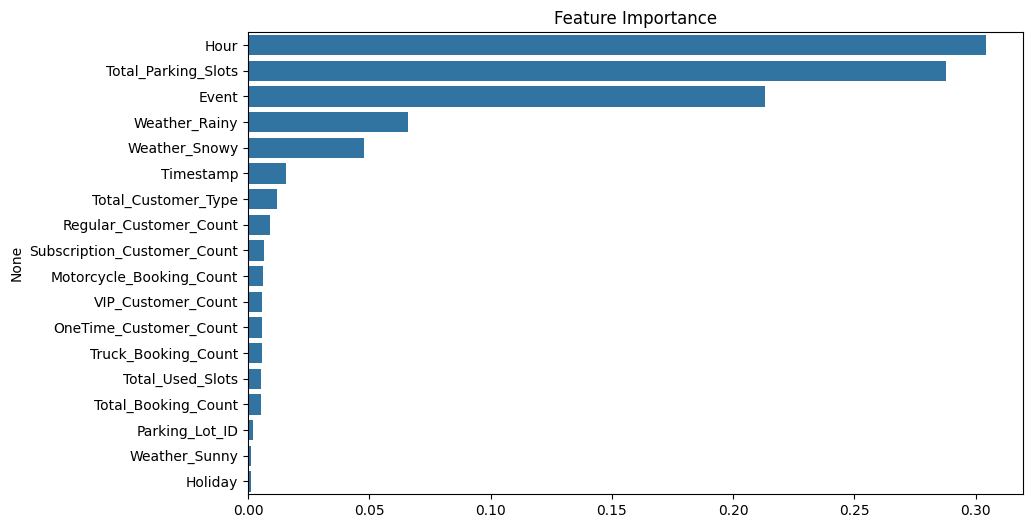

In [10]:
#show relative importance of features
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

feature_importance = model.feature_importances_
feature_names = X.columns

indices = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[indices], y=feature_names[indices])
plt.title("Feature Importance")
plt.show()

In [11]:
# Predictions
y_pred = model.predict(X_test)

# MAE

In [13]:


# Example prediction for each target variable (Assuming y_pred and y_test are DataFrames)
mae_car = mean_absolute_error(y_test['Available_Car_Spots'], y_pred[:, 0])
mae_van = mean_absolute_error(y_test['Available_Van_Spots'], y_pred[:, 1])
mae_truck = mean_absolute_error(y_test['Available_Truck_Spots'], y_pred[:, 2])
mae_motorcycle = mean_absolute_error(y_test['Available_Motorcycle_Spots'], y_pred[:, 3])

# Print individual MAE
print("MAE for Available_Car_Spots:", mae_car)
print("MAE for Available_Van_Spots:", mae_van)
print("MAE for Available_Truck_Spots:", mae_truck)
print("MAE for Available_Motorcycle_Spots:", mae_motorcycle)

# Optionally, average MAE for all targets
mae_average = (mae_car + mae_van + mae_truck + mae_motorcycle) / 4
print("Average MAE:", mae_average)


MAE for Available_Car_Spots: 87.88062172700363
MAE for Available_Van_Spots: 29.29670679644809
MAE for Available_Truck_Spots: 14.651373377732241
MAE for Available_Motorcycle_Spots: 14.651373377732241
Average MAE: 36.620018819729054


# mean_squared_error

In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Example prediction for each target variable
mse_car = mean_squared_error(y_test['Available_Car_Spots'], y_pred[:, 0])
mse_van = mean_squared_error(y_test['Available_Van_Spots'], y_pred[:, 1])
mse_truck = mean_squared_error(y_test['Available_Truck_Spots'], y_pred[:, 2])
mse_motorcycle = mean_squared_error(y_test['Available_Motorcycle_Spots'], y_pred[:, 3])

# Print individual MSE
print("MSE for Available_Car_Spots:", mse_car)
print("MSE for Available_Van_Spots:", mse_van)
print("MSE for Available_Truck_Spots:", mse_truck)
print("MSE for Available_Motorcycle_Spots:", mse_motorcycle)




MSE for Available_Car_Spots: 18646.639288506092
MSE for Available_Van_Spots: 2071.892377672473
MSE for Available_Truck_Spots: 517.9582917193192
MSE for Available_Motorcycle_Spots: 517.9582917193192


In [15]:


# Example prediction for each target variable 
r2_car = r2_score(y_test['Available_Car_Spots'], y_pred[:, 0])
r2_van = r2_score(y_test['Available_Van_Spots'], y_pred[:, 1])
r2_truck = r2_score(y_test['Available_Truck_Spots'], y_pred[:, 2])
r2_motorcycle = r2_score(y_test['Available_Motorcycle_Spots'], y_pred[:, 3])

# Print individual R² scores
print("R² for Available_Car_Spots:", r2_car)
print("R² for Available_Van_Spots:", r2_van)
print("R² for Available_Truck_Spots:", r2_truck)
print("R² for Available_Motorcycle_Spots:", r2_motorcycle)

# Optionally, average R² score for all targets
r2_average = (r2_car + r2_van + r2_truck + r2_motorcycle) / 4
print("Average R² score:", r2_average)


R² for Available_Car_Spots: 0.9154990276284752
R² for Available_Van_Spots: 0.9154976801073874
R² for Available_Truck_Spots: 0.915501887511882
R² for Available_Motorcycle_Spots: 0.915501887511882
Average R² score: 0.9155001206899067


In [16]:
    # Save the model
    model_filename = "model_of_available_predictions.pkl"
    joblib.dump(model, model_filename)

    print(f"Model saved as {model_filename}")

Model saved as model_of_available_predictions.pkl


In [18]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load("model_of_available_predictions.pkl")

# Function to preprocess and predict available spots based on input data
def predict_from_input(input_data):
    # Convert input_data into a DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Preprocess the input data
    input_df['Timestamp'] = pd.to_datetime(input_df['Timestamp'])
    input_df['Hour'] = input_df['Timestamp'].dt.hour
    input_df['Timestamp'] = input_df['Timestamp'].astype('int64') // 10**9  # Convert to UNIX timestamp
    
    # One-hot encode the 'Weather' column (assuming it was encoded during training)
    input_df = pd.get_dummies(input_df, columns=['Weather'], drop_first=True)
    
    # Ensure all columns in X_train are present in input_df, adding missing ones with 0 values
    missing_cols = set(X.columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0
    
    # Reorder columns to match the training set
    input_df = input_df[X.columns]
    
    # Make prediction using the loaded model (predicting multiple outputs)
    predicted_spots = model.predict(input_df)
    
    # Convert predicted spots to a DataFrame for easy interpretation
    predicted_df = pd.DataFrame(predicted_spots, columns=['Available_Car_Spots', 'Available_Van_Spots', 'Available_Truck_Spots', 'Available_Motorcycle_Spots'])
    
    return predicted_df


# Example of how to use the function with the updated input structure
new_data = {
    'Timestamp': "2025-03-15 12:30:00",  # Example timestamp
    'Parking_Lot_ID': 2,                 # Example parking lot ID
    'Weather': 3,                        # Example weather (3 could correspond to a specific weather type)
    'Event': 1,                          # Example event status (binary encoding)
    'Holiday': 0,                        # Example holiday status (binary encoding)
    'Avg_Entry_15Min': 5,                # Example average entry in 15 minutes
    'Avg_Exit_15Min': 3,                 # Example average exit in 15 minutes
    'Total_Parking_Slots': 100,          # Example total parking slots
    'Total_Used_Slots': 50               # Example total used parking slots
}

# Predict available parking spots using the function
predicted_spots = predict_from_input(new_data)

# Print each predicted output line by line
for spot_type, value in predicted_spots.iloc[0].items():
    print(f"{spot_type}: {value}")


Available_Car_Spots: 50.86
Available_Van_Spots: 16.66
Available_Truck_Spots: 8.08
Available_Motorcycle_Spots: 8.08
